### Setup

In [8]:
# Install required packages if not yet installed
# !pip install datasets matplotlib pandas

# Imports
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter


### Load GoEmotions Dataset

In [9]:
# Load GoEmotions dataset
dataset = load_dataset("go_emotions")

# Check available splits
print(dataset)

# Check a sample
print(dataset['train'][0])


DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})
{'text': "My favourite food is anything I didn't have to cook myself.", 'labels': [27], 'id': 'eebbqej'}


In [10]:
# Get the label names
label_names = dataset['train'].features['labels'].feature.names
print(label_names)


['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


Smallest counts: [('neutral', 14219), ('admiration', 4130), ('approval', 2939), ('gratitude', 2662), ('annoyance', 2470), ('amusement', 2328), ('curiosity', 2191), ('love', 2086), ('disapproval', 2022), ('optimism', 1581), ('anger', 1567), ('joy', 1452), ('confusion', 1368), ('sadness', 1326), ('disappointment', 1269), ('realization', 1110), ('caring', 1087), ('surprise', 1060), ('excitement', 853), ('disgust', 793), ('desire', 641), ('fear', 596), ('remorse', 545), ('embarrassment', 303), ('nervousness', 164), ('relief', 153), ('pride', 111), ('grief', 77)]


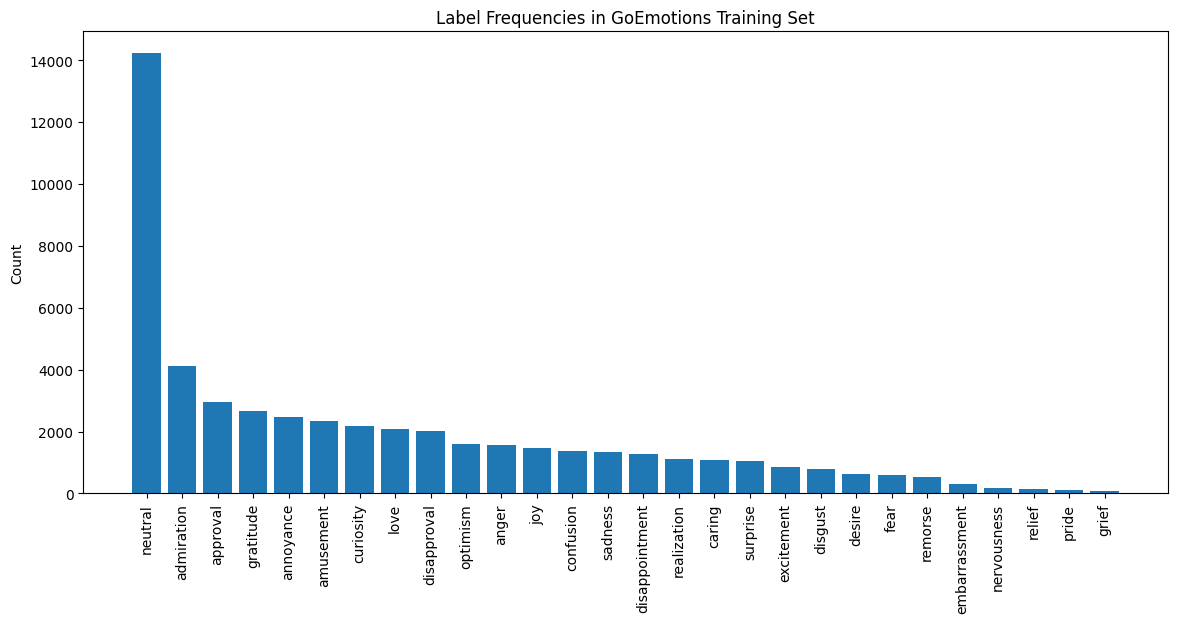

In [14]:
# Flatten all labels across samples
all_labels = [label for sample in dataset['train'] for label in sample['labels']]

# Count frequency
label_counts = Counter(all_labels)

# Map to label names
label_counts_named = {label_names[i]: count for i, count in label_counts.items()}

# Sort by frequency
sorted_counts = dict(sorted(label_counts_named.items(), key=lambda item: item[1], reverse=True))

# print the smallest and largest counts
print("Smallest counts:", list(sorted_counts.items()))


# Plot
plt.figure(figsize=(14,6))
plt.bar(sorted_counts.keys(), sorted_counts.values())
plt.xticks(rotation=90)
plt.title("Label Frequencies in GoEmotions Training Set")
plt.ylabel("Count")
plt.show()


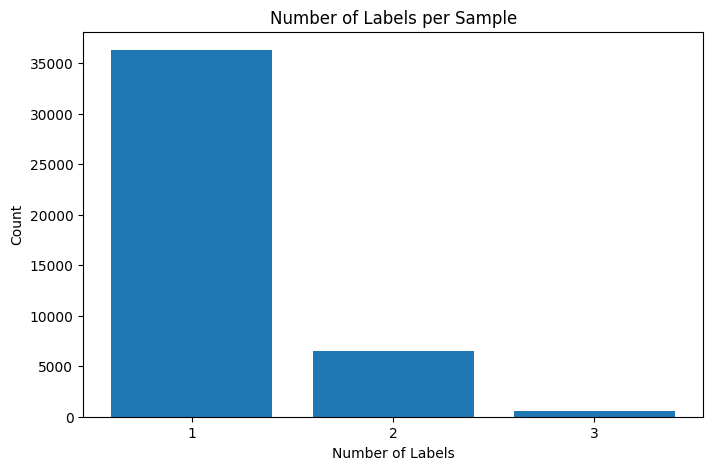

In [ ]:
# How many labels per sample
num_labels_per_sample = [len(sample['labels']) for sample in dataset['train']]

plt.figure(figsize=(8,5))
plt.hist(num_labels_per_sample, bins=[1,2,3,4], align='left', rwidth=0.8)
plt.xticks([1,2,3])
plt.title("Number of Labels per Sample")
plt.xlabel("Number of Labels")
plt.ylabel("Count")
plt.show()


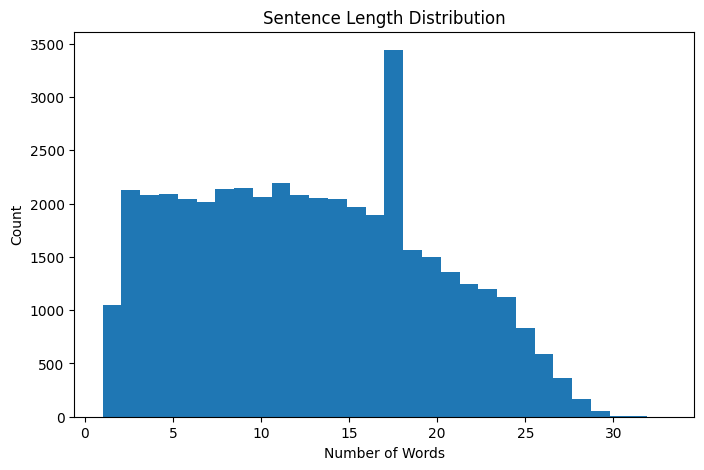

In [ ]:
# Check how long texts are (by word count)
sentence_lengths = [len(sample['text'].split()) for sample in dataset['train']]

plt.figure(figsize=(8,5))
plt.hist(sentence_lengths, bins=30)
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.show()
